> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Load the Dataset

In [186]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Investigate the dataset

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [188]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

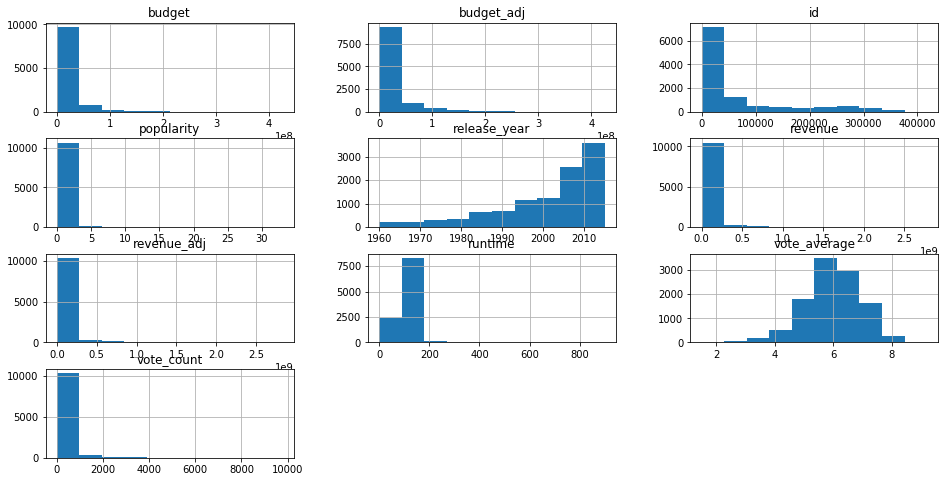

In [189]:
df.hist(figsize=(16,8));

In [190]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [191]:
df.duplicated().sum()

1

- Issues
    - one duplicate
    - `id` should be string
    - `release_date` should be datetime

#### `release_year` column

In [192]:
#Search for categorical variables
df['release_year'].value_counts().sort_values(ascending=False).head(15)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
Name: release_year, dtype: int64

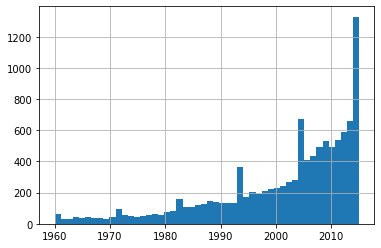

In [193]:
df['release_year'].hist(bins=50);

#### `director` column

In [194]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Tim Burton           19
Wes Craven           19
John Carpenter       18
David Cronenberg     18
Mike Nichols         18
Name: director, dtype: int64

#### `original_title` column

In [195]:
df['original_title'].value_counts().head(15)

Hamlet                  4
Julia                   3
A Christmas Carol       3
Jane Eyre               3
Frankenstein            3
The Black Hole          3
Carrie                  3
Oliver Twist            3
Life                    3
Shelter                 3
Hercules                3
Annie                   3
Wuthering Heights       3
Emma                    3
The Three Musketeers    3
Name: original_title, dtype: int64

It's not strange that there are many repeated titles, because famous movies are re-acted but let's check!

In [196]:
df[df['original_title'] == 'Hamlet']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


In [197]:
df[df['original_title'] == 'Carrie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4101,7342,tt0319970,0.257263,0,0,Carrie,Angela Bettis|Patricia Clarkson|Rena Sofer|Kan...,NaN,David Carson,NaN,...,Carrie White is a lonely and painfully shy tee...,132,Drama|Horror,MGM Television|Trilogy Entertainment Group,11/4/02,53,5.5,2002,0.000000e+00,0.000000e+00
5486,133805,tt1939659,1.412233,30000000,82394288,Carrie,ChloÃ« Grace Moretz|Julianne Moore|Judy Greer|...,http://www.carrie-movie.com,Kimberly Peirce,Know her name. Fear her power.,...,A reimagining of the classic horror tale about...,100,Drama|Horror,Screen Gems|Metro-Goldwyn-Mayer (MGM)|Misher F...,10/16/13,897,5.8,2013,2.808100e+07,7.712380e+07
10175,7340,tt0074285,1.263483,1800000,33800000,Carrie,Sissy Spacek|Piper Laurie|Amy Irving|William K...,NaN,Brian De Palma,If youâ€™ve got a taste for terror... take Car...,...,"Carrie may be ostracized, but the shy teen has...",98,Horror|Thriller,United Artists,11/3/76,497,6.8,1976,6.897056e+06,1.295114e+08


In [198]:
df[df['original_title'] == 'Annie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
724,196867,tt1823664,1.588010,65000000,133821816,Annie,QuvenzhanÃ© Wallis|Jamie Foxx|Rose Byrne|Camer...,NaN,Will Gluck,It's a Hard Knock Life,...,"Ever since her parents left her as a baby, lit...",119,Music|Comedy|Drama|Family,Columbia Pictures|Sony Pictures Entertainment ...,12/19/14,331,6.1,2014,5.987092e+07,1.232621e+08
2485,26177,tt0207972,0.548720,0,0,Annie,Kathy Bates|Victor Garber|Alan Cumming|Audra M...,NaN,Rob Marshall,Disney makes the classical musical more magica...,...,Eleven-year-old Annie has been living in an or...,90,Music|Family|Comedy,Walt Disney Television|Storyline Entertainment...,11/7/99,35,5.5,1999,0.000000e+00,0.000000e+00
8920,15739,tt0083564,0.421748,50000000,57059003,Annie,Aileen Quinn|Albert Finney|Carol Burnett|Ann R...,NaN,John Huston,The movie of 'Tomorrow',...,An orphan in a facility run by the mean Miss H...,127,Comedy|Drama|Family|Music,Columbia Pictures|Rastar Pictures,6/18/82,99,6.2,1982,1.129821e+08,1.289329e+08


Cool, they're not duplicates. No worries here.

#### `homepage` column

In [199]:
df['homepage'].isnull().sum()

7930

In [200]:
df['homepage'].sample(10)

10548                                                  NaN
3751                                                   NaN
6422                                                   NaN
8988                                                   NaN
6253                  http://www.americanreunionmovie.com/
3695                                                   NaN
3917     http://www.starwars.com/films/star-wars-episod...
2055     http://filminfocus.com/focusfeatures/film/the_...
10717                                                  NaN
9178                                                   NaN
Name: homepage, dtype: object

Looks like the column `homepage` won't be of much use, since it's has many nans

#### `tagline` column

In [201]:
# Can't really imagine what tagline column might be like
df['tagline'].sample(10)

9273    Beyond the boundaries of time... they are wait...
7117                   Miracles are closer than you think
1905                                                  NaN
917                                       Enjoy the show.
9424                                                  NaN
2692                            Love with the safety off.
9580    A drawing that became a dream. A dream that be...
8812     Six littles souls in search of a little harmony.
6466                   The family will never be the same.
8950    The story of a boy suddenly alone in the world...
Name: tagline, dtype: object

In [202]:
df['tagline'].isnull().sum()

2824

#### `keywords` column

In [203]:
df['keywords'].sample(10)

7127                            biography|stephen hawking
4482                                                  NaN
5193     vietnam|politics|war|lesson|secretary of defense
1978       journalist|forbidden love|princess|royal court
6340        high school|bong|spirit|mirror|woman director
6238    martial arts|telepathy|dystopia|spaceship|fugi...
2214                      world war ii|tv mini-series|hbo
6000                                           possession
8110    paris|airport|in love with enemy|canadian|neck...
8406    jupiter|wife husband relationship|marshal|wife...
Name: keywords, dtype: object

In [204]:
df['keywords'].value_counts().head(15)

woman director                     134
independent film                    82
sport                               25
musical                             24
suspense                            24
duringcreditsstinger                24
stand-up|stand up comedy            16
holiday                             16
biography                           15
independent film|woman director     13
stand up comedy                      9
christmas                            7
based on novel                       7
dystopia                             7
found footage                        7
Name: keywords, dtype: int64

In [205]:
df['keywords'].isnull().sum()

1493

#### `overview` column

In [206]:
df['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                    13
In the year of 2039, after World Wars destroy much of the civilization as we know it, territories are no longer run by governments, but by corporations; the mightiest of which is the Mishima Zaibatsu. In order to placate the seething masses of this dystopia, Mishima sponsors Tekken, a tournament in which fighters battle until only one is left standing.     2
Wilbur the pig is scared of the end of the season, because he knows that come that time, he will end up on the dinner table. He hatches a plan with Charlotte, a spider that lives in his pen, to ensure that this will never happen.                                                 

In [207]:
useless_overviews = sum(df['overview'].isnull()) + sum(df['overview'] == 'No overview found.')
useless_overviews

17

#### `production_companies` column

In [208]:
df['production_companies'].value_counts().head(25)

Paramount Pictures                              156
Universal Pictures                              133
Warner Bros.                                     84
Walt Disney Pictures                             76
Metro-Goldwyn-Mayer (MGM)                        72
Columbia Pictures                                72
New Line Cinema                                  61
Touchstone Pictures                              51
20th Century Fox                                 50
Twentieth Century Fox Film Corporation           49
TriStar Pictures                                 45
Orion Pictures                                   42
Miramax Films                                    32
DreamWorks Animation                             31
Columbia Pictures Corporation                    31
Pixar Animation Studios                          30
Walt Disney Productions                          29
Dimension Films                                  28
United Artists                                   23
Marvel Studi

#### `release_date` column

In [209]:
df['release_date'].sample(10)

4871    9/29/12
5375     7/2/97
3172    8/15/08
2726    4/10/01
6229    1/13/05
6231     9/9/05
5382     4/4/97
4494    5/24/12
3565    8/17/11
7116    4/30/04
Name: release_date, dtype: object

#### `vote_count` column

In [210]:
df['vote_count'].sample(10)

4134      71
5674      18
9325     161
5237      10
8394      12
4345      17
3560      45
1216      19
8052      25
8076    1002
Name: vote_count, dtype: int64

In [211]:
#to get a sense of the numbers
df['vote_count'].describe()

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

#### `popularity` column

In [212]:
#to get a sense of the numbers
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [213]:
df['popularity'].min()

6.500000000000001e-05

In [214]:
df[df['popularity'] == df['popularity'].min()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.0


Runtime is 561 mins which is wierd!!

#### `runtime` column

In [215]:
sum(df['runtime'] >= 180)

145

Apparantly, there's something wrong

In [216]:
df[df['runtime'] >= 180].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3835,75964,tt1113829,0.256142,0,0,George Harrison: Living in the Material World,George Harrison|Paul McCartney|John Lennon|Rin...,NaN,Martin Scorsese,NaN,...,"Inter-cut with archive material, friends, fami...",208,Music|Documentary,NaN,10/5/11,24,8.0,2011,0.000000e+00,0.000000e+00
5330,106035,tt0118460,0.427343,0,0,The Shining,Steven Weber|Rebecca De Mornay|Stephen King|Wi...,NaN,Mick Garris,110 empty hotel rooms - filled with horror!,...,John Torrance is a writer &amp; recovering alc...,273,Drama|Horror|Thriller|TV Movie,Lakeside Productions,5/23/97,37,6.1,1997,0.000000e+00,0.000000e+00
8134,10858,tt0113987,0.604331,44000000,13681765,Nixon,Anthony Hopkins|Joan Allen|Powers Boothe|Ed Ha...,NaN,Oliver Stone,NaN,...,An all-star cast powers this epic look at Amer...,192,History|Drama,Hollywood Pictures|Cinergi Pictures Entertainment,12/22/95,30,6.3,1995,6.296254e+07,1.957815e+07
4222,12160,tt0111756,0.684636,63000000,25052000,Wyatt Earp,Kevin Costner|Dennis Quaid|Gene Hackman|David ...,NaN,Lawrence Kasdan,The epic story of love and adventure in a lawl...,...,Covering the life and times of one of the West...,191,Drama|Action|Western,Tig Productions|Warner Bros.|Kasdan Pictures|P...,6/24/94,108,6.3,1994,9.268003e+07,3.685429e+07
7256,89049,tt0388644,0.001315,0,0,SoupÃ§ons,Michael Peterson,NaN,Jean-Xavier de Lestrade,Accident or cold-blooded murder?,...,"Academy Award-winning documentary filmmaker, J...",360,Drama|Documentary,NaN,6/1/04,12,7.5,2004,0.000000e+00,0.000000e+00


The dataset has movies and series/miniseries which is considered a tidiness issue

#### `genres` column

In [217]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

#### `budget` & `budget_adj` columns

In [218]:
#to get a sense of the range of values in the budget column
df['budget'].describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [219]:
#because it doesn't make sense to have a budget of zero
df[df['budget'] == 0].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
725,207933,tt1772264,1.570083,0,0,Stonehearst Asylum,Kate Beckinsale|Jim Sturgess|Ben Kingsley|Mich...,NaN,Brad Anderson,No one is what they seem.,...,A Harvard Medical School graduate takes a posi...,112,Horror|Thriller,Icon Productions|Sobini Films,9/11/14,247,6.6,2014,0.0,0.0
566,308447,tt2948202,0.090238,0,0,The Flintstones & WWE: Stone Age Smackdown,Jeff Bergman|Kevin Michael Richardson|Tress Ma...,NaN,Spike Brandt|Tony Cervone,The Flintstones & WWE: Stone Age Smackdown,...,The WWE comes to town in the new animated film...,52,Animation|Comedy|Family,Warner Bros. Animation|Hanna-Barbera|WWE Studios,3/17/15,12,5.5,2015,0.0,0.0
3154,31216,tt0830570,0.315842,0,0,I Can't Think Straight,Lisa Ray|Sheetal Sheth|Antonia Frering|Dalip T...,http://www.icantthinkstraightfilm.com/,Shamim Sarif,NaN,...,I Can't Think Straight is a 2007 romance movie...,80,Drama|Romance,Enlightenment Productions,6/1/08,28,6.9,2008,0.0,0.0


In [220]:
# let's check if we can fix them by using the 2010 dollar values
df['budget_adj'].min()

0.0

In [221]:
df['budget_adj'].describe()

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

#### `revenue` & `revenue_adj` columns

In [222]:
# to get a sense of the range of values in revenue
df['revenue'].describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [223]:
sum(df['revenue'] == 0)

6016

In [224]:
sum(df['revenue'] != 0)

4850

In [225]:
# to get a sense of the range of values in revenue
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [226]:
df[df['revenue'] == df['revenue'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5416,15321,tt0120394,0.064556,0,0,Twin Town,Rhys Ifans|Dougray Scott|LlÅ·r Ifans|Dorien Th...,NaN,Kevin Allen,NaN,...,"Julian and Jeremy, two brothers known as the ""...",99,Comedy|Drama,Figment Films|Aimimage Productions|Polygram Fi...,4/11/97,10,5.6,1997,0.000000e+00,0.0
8837,29946,tt0200669,0.162041,15000000,0,The Golden Bowl,Kate Beckinsale|James Fox|Anjelica Huston|Nick...,NaN,James Ivory,NaN,...,An intricately plotted tale of thwarted love a...,130,Drama|Foreign|Romance,Merchant Ivory Productions|TF1 International,5/14/00,13,5.8,2000,1.899438e+07,0.0
156,157843,tt1837636,0.973316,15000000,0,Queen of the Desert,Nicole Kidman|James Franco|Robert Pattinson|Da...,NaN,Werner Herzog,NaN,...,"A chronicle of Gertrude Bell's life, a travele...",128,Drama|History,Benaroya Pictures|H Films|Raslan Company of Am...,9/3/15,30,6.0,2015,1.379999e+07,0.0


In [227]:
df[df['revenue_adj'] == df['revenue_adj'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8618,26949,tt0116621,0.261042,0,0,In Love and War,Sandra Bullock|Chris O'Donnell|Mackenzie Astin...,NaN,Richard Attenborough,In war they found each other...In each other t...,...,After teenage ambulance driver Ernest Hemingwa...,113,Drama|Romance,New Line Cinema|Dimitri Villard Productions,12/18/96,13,5.8,1996,0.0,0.0
8368,19087,tt0104670,0.049061,0,0,LadyBugs,Rodney Dangerfield|JackÃ©e Harry|Jonathan Bran...,NaN,Sidney J. Furie,NaN,...,"To climb the corporate ladder to success, a gu...",90,Comedy|Family,Paramount Pictures,3/27/92,18,5.7,1992,0.0,0.0
313,94365,tt1883367,0.386529,0,0,The Human Centipede 3 (Final Sequence),Dieter Laser|Laurence R. Harvey|Robert LaSardo...,NaN,Tom Six,100% politically incorrect,...,Taking inspiration from The Human Centipede fi...,103,Horror,Six Entertainment,5/22/15,75,3.5,2015,0.0,0.0


#### `vote_average` column

In [228]:
# to get a sense of the vote average
df['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [229]:
df['vote_average'].value_counts().head(15)

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
6.3    461
6.5    457
6.4    446
5.7    415
6.6    413
5.6    412
5.5    380
6.7    376
5.3    358
5.4    338
Name: vote_average, dtype: int64

This means that `vote_average` ranges from 1 to 10.

To sum up the issues that need to be solved
- one duplicate
- `id` should be string
- `release_date` should be datetime
- Remove the series and miniseries into a separate table
- Columns to be dropped(because we won't use them):<br>
    - imdb_id
    - budget_adj
    - revenue_adj
    - overview
    - tagline

To sum up the questions that need to be answered
- which genres are most popular every year?
- which directors are the most popular in the 70s, 60s, 90s, and 2000s?
- which movies are the most popular in the 70s, 60s, 90s, and 2000s?
- How does the movie budgets change every year?
- Does the movie budget affect its popularity?
- Does the movie runtime affect its popularity?
- Is there a relation between production companies and the movie's popularity?
- Does certain genres get high budget than others?
- Does certain directors generate bigger revenue?
<br><br>
- high revenue movies vs (genre, budget, director, runtime, production company)
- popularity vs (genre, director, budget, runtime, production company)
- title vs (popularity, vote average, homepage, genre, director, production company)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [262]:
# Make a copy of the clean data
movies = df.copy()

#### Filling the empty string values

In [263]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [264]:
movies.fillna("empty", inplace=True)

In [265]:
movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Removing the duplicate

In [266]:
movies.drop_duplicates(inplace=True)

In [267]:
# Just to check
movies.duplicated().sum()

0

#### Fixing the `id` column

In [268]:
movies['id'].dtype

dtype('int64')

In [269]:
movies['id'] = movies['id'].astype(str)

In [270]:
# To check
movies['id'].dtype

dtype('O')

#### Fixing the `release_date` column

In [271]:
movies['release_date'].dtype

dtype('O')

In [272]:
movies['release_date'].sample()

705    1/30/14
Name: release_date, dtype: object

The given order is month/day/year. We can take the year from the `release_year` column

In [273]:
# Removing the last 2 characters (which indicate the year) and adding the year from the release_year column
movies['release_date'] = movies['release_date'].map(lambda x: x[:-2])
movies['release_date'] = movies['release_date'] + movies['release_year'].astype(str)

In [274]:
movies['release_date'].sample()

4262    9/24/1994
Name: release_date, dtype: object

In [275]:
# Changing the type into datetime
pd.to_datetime(movies['release_date'], format='%m/%d/%Y')

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

#### Drop the unnecessary columns

In [276]:
to_be_dropped_columns = ['imdb_id', 'budget_adj', 'revenue_adj', 'overview', 'tagline']
movies.drop(to_be_dropped_columns, axis=1, inplace=True)
# Just to check
movies.shape

(10865, 16)

#### Splitting the table into 2 tables

In [277]:
movies.shape

(10865, 16)

In [278]:
series = pd.DataFrame(movies[movies['runtime'] > 180 ])

In [279]:
series.shape

(128, 16)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Genres Analysis

In [293]:
top_genres = movies.genres.value_counts().sort_values(ascending=False).head(7)
top_genres

Comedy             712
Drama              702
Documentary        299
Drama|Romance      286
Comedy|Drama       279
Comedy|Romance     268
Horror|Thriller    259
Name: genres, dtype: int64

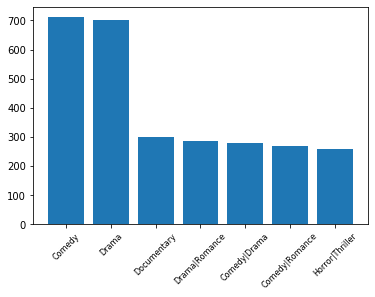

In [294]:
plt.bar(top_genres.keys(), top_genres)
plt.xticks(rotation=45, fontsize=8)
plt.show();

In [307]:
top_genres_by_years = movies['release_year'].query('genres == "Comedy"').value_counts().sort_values(ascending=False).head(7)
top_genres_by_years

AttributeError: 'Series' object has no attribute 'query'

### Revenue Analysis

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Directors & Production Companies Analysis

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!